In [1]:
!python --version

Python 3.8.7


In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url= 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv'

In [4]:
df = pd.read_csv(url)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.shape

(891, 12)

In [6]:
df.drop(['PassengerId','Name','Ticket','Cabin'],'columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df[df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

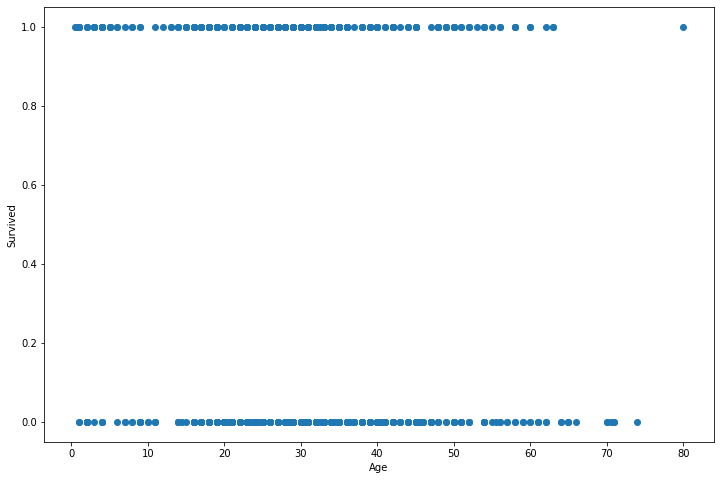

In [10]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(df['Age'],df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

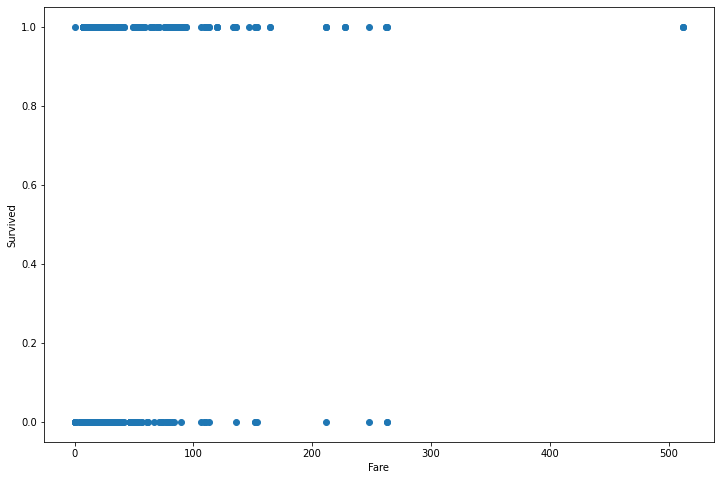

In [11]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(df['Fare'],df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

In [12]:
pd.crosstab(df['Sex'],df['Survived']) #  for small domain feature

Survived,0,1
Sex,,
female,64,195
male,360,93


In [13]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [14]:
df_corr = df.corr()
df_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<AxesSubplot:>

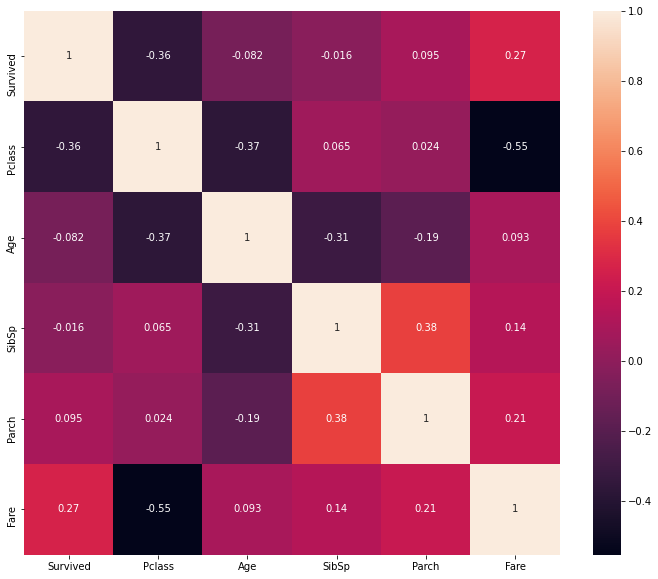

In [15]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_corr,annot=True)

In [16]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
df['Sex'] = label_encoding.fit_transform(df['Sex'].astype(str))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [17]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [18]:
df = pd.get_dummies(df,columns=['Embarked'])

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [20]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()  #suffle dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,10.0,0,2,24.1500,0,0,1
1,1,2,0,19.0,0,0,26.0000,0,0,1
2,0,3,1,30.0,0,0,7.2500,0,0,1
3,0,3,0,22.0,0,0,10.5167,0,0,1
4,1,1,1,35.0,0,0,26.5500,1,0,0


In [21]:
df.to_csv('titanic_processed.csv',index=False)

# Binary Classification

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived',axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
X_train.shape, y_train.shape

((569, 9), (569,))

In [24]:
X_test.shape,y_test.shape

((143, 9), (143,))

In [25]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2',C=1.0,solver='liblinear') 

In [26]:
logistic_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [27]:
y_pred = logistic_model.predict(X_test)

In [28]:
pred_results = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

In [29]:
pred_results.head()

,y_test,y_pred
521,0,0
317,1,1
459,1,1
306,0,0
92,1,1


In [30]:
pred_cross = pd.crosstab(pred_results.y_pred,pred_results.y_test)
pred_cross

y_test,0,1
y_pred,,
0,72,13
1,7,51


In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [32]:
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print('acc score: ',acc)
print('precision score:', prec)
print('recall_score: ',recall)

acc score:  0.8601398601398601
precision score: 0.8793103448275862
recall_score:  0.796875


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,10.0,0,2,24.1500,0,0,1
1,1,2,0,19.0,0,0,26.0000,0,0,1
2,0,3,1,30.0,0,0,7.2500,0,0,1
3,0,3,0,22.0,0,0,10.5167,0,0,1
4,1,1,1,35.0,0,0,26.5500,1,0,0


In [35]:
FEATURES = list(df.columns[1:])
FEATURES

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [36]:
result_dict = {}

In [37]:
def summarize_classification(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)

    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)

    return {'acc: ': acc,
            'precision': prec,
            'recall':recall,
            'acc_count':num_acc}

In [38]:
def build_model(classifier_fn,
                name_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2):
    X = dataset[names_of_x_cols]
    y = dataset[name_of_y_col]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_frac)
    model = classifier_fn(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    train_summary = summarize_classification(y_train,y_pred_train)
    test_summary = summarize_classification(y_test,y_pred)

    pred_results = pd.DataFrame({'y_test': y_test,
                                'y_pred':y_pred})
    model_crosstab = pd.crosstab(pred_results.y_pred,pred_results.y_test)

    return {'training':train_summary,
            'test':test_summary,
            'confusion_matrix':model_crosstab}

In [39]:
def compare_results():
    for key in result_dict:
        print('Classification: ',key)
        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score,result_dict[key]['training'][score])
        print()
        print('Testing data')
        for score in result_dict[key]['test']:
            print(score,result_dict[key]['test'][score])
        print()

In [40]:
def logistict_fn(X_train,y_train):
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train,y_train)
    return model

In [41]:
result_dict['survived ~ logistic'] = build_model(logistict_fn,'Survived',FEATURES,df)
compare_results()

Classification:  survived ~ logistic

Training data
acc:  0.7996485061511424
precision 0.7920792079207921
recall 0.6896551724137931
acc_count 455

Testing data
acc:  0.7832167832167832
precision 0.7272727272727273
recall 0.7142857142857143
acc_count 112



## Chose classification algorithm

In [42]:
def linear_disciminant_fn(x_train,y_train,solver='svd'):
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train,y_train)
    return model

In [43]:
result_dict['survived ~ linear_disciminant_analysis'] = build_model(linear_disciminant_fn,'Survived',FEATURES,df)
compare_results()

Classification:  survived ~ logistic

Training data
acc:  0.7996485061511424
precision 0.7920792079207921
recall 0.6896551724137931
acc_count 455

Testing data
acc:  0.7832167832167832
precision 0.7272727272727273
recall 0.7142857142857143
acc_count 112

Classification:  survived ~ linear_disciminant_analysis

Training data
acc:  0.7926186291739895
precision 0.7707317073170732
recall 0.6899563318777293
acc_count 451

Testing data
acc:  0.8111888111888111
precision 0.8076923076923077
recall 0.711864406779661
acc_count 116



In [44]:
def quaratic_disciminant_fn(x_train,y_train):
    model = QuadraticDiscriminantAnalysis()
    model.fit(x_train,y_train)
    return model

In [45]:
result_dict['survived ~ quaratic_disciminant_analysis'] = build_model(quaratic_disciminant_fn,'Survived',FEATURES,df)
compare_results()

Classification:  survived ~ logistic

Training data
acc:  0.7996485061511424
precision 0.7920792079207921
recall 0.6896551724137931
acc_count 455

Testing data
acc:  0.7832167832167832
precision 0.7272727272727273
recall 0.7142857142857143
acc_count 112

Classification:  survived ~ linear_disciminant_analysis

Training data
acc:  0.7926186291739895
precision 0.7707317073170732
recall 0.6899563318777293
acc_count 451

Testing data
acc:  0.8111888111888111
precision 0.8076923076923077
recall 0.711864406779661
acc_count 116

Classification:  survived ~ quaratic_disciminant_analysis

Training data
acc:  0.4903339191564148
precision 0.4474708171206226
recall 0.9745762711864406
acc_count 279

Testing data
acc:  0.44755244755244755
precision 0.3953488372093023
recall 0.9807692307692307
acc_count 64

C:\Users\baoth\AppData\Roaming\Python\Python38\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [46]:
def sgd_fn(x_train,y_train,max_inter=10000,tol=1e-3):
    model = SGDClassifier(max_iter=max_inter,tol=tol)
    model.fit(x_train,y_train)
    return model

In [47]:
result_dict['survived ~ sgd'] = build_model(sgd_fn,'Survived',FEATURES,df)
compare_results()

Classification:  survived ~ logistic

Training data
acc:  0.7996485061511424
precision 0.7920792079207921
recall 0.6896551724137931
acc_count 455

Testing data
acc:  0.7832167832167832
precision 0.7272727272727273
recall 0.7142857142857143
acc_count 112

Classification:  survived ~ linear_disciminant_analysis

Training data
acc:  0.7926186291739895
precision 0.7707317073170732
recall 0.6899563318777293
acc_count 451

Testing data
acc:  0.8111888111888111
precision 0.8076923076923077
recall 0.711864406779661
acc_count 116

Classification:  survived ~ quaratic_disciminant_analysis

Training data
acc:  0.4903339191564148
precision 0.4474708171206226
recall 0.9745762711864406
acc_count 279

Testing data
acc:  0.44755244755244755
precision 0.3953488372093023
recall 0.9807692307692307
acc_count 64

Classification:  survived ~ sgd

Training data
acc:  0.46397188049209137
precision 0.41596638655462187
recall 0.88
acc_count 264

Testing data
acc:  0.46153846153846156
precision 0.4453125
recall 

In [53]:
def linear_svc_fn(x_train,y_train,C=1.0,max_iter=1000,tol=1e-3):
    model = LinearSVC(C=C,max_iter=max_iter,tol=tol,dual=False)
    model.fit(x_train,y_train)
    return model

In [54]:
result_dict['survived ~ linear_svc'] = build_model(linear_svc_fn,'Survived',FEATURES,df)
compare_results()

Classification:  survived ~ logistic

Training data
acc:  0.7996485061511424
precision 0.7920792079207921
recall 0.6896551724137931
acc_count 455

Testing data
acc:  0.7832167832167832
precision 0.7272727272727273
recall 0.7142857142857143
acc_count 112

Classification:  survived ~ linear_disciminant_analysis

Training data
acc:  0.7926186291739895
precision 0.7707317073170732
recall 0.6899563318777293
acc_count 451

Testing data
acc:  0.8111888111888111
precision 0.8076923076923077
recall 0.711864406779661
acc_count 116

Classification:  survived ~ quaratic_disciminant_analysis

Training data
acc:  0.4903339191564148
precision 0.4474708171206226
recall 0.9745762711864406
acc_count 279

Testing data
acc:  0.44755244755244755
precision 0.3953488372093023
recall 0.9807692307692307
acc_count 64

Classification:  survived ~ sgd

Training data
acc:  0.46397188049209137
precision 0.41596638655462187
recall 0.88
acc_count 264

Testing data
acc:  0.46153846153846156
precision 0.4453125
recall 

In [55]:
def radius_neighbor_fn(x_train,y_train,radius=40.0):
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train,y_train)
    return model

In [56]:
result_dict['survived ~ radius_neighbors'] = build_model(radius_neighbor_fn,'Survived',FEATURES,df)
compare_results()

Classification:  survived ~ logistic

Training data
acc:  0.7996485061511424
precision 0.7920792079207921
recall 0.6896551724137931
acc_count 455

Testing data
acc:  0.7832167832167832
precision 0.7272727272727273
recall 0.7142857142857143
acc_count 112

Classification:  survived ~ linear_disciminant_analysis

Training data
acc:  0.7926186291739895
precision 0.7707317073170732
recall 0.6899563318777293
acc_count 451

Testing data
acc:  0.8111888111888111
precision 0.8076923076923077
recall 0.711864406779661
acc_count 116

Classification:  survived ~ quaratic_disciminant_analysis

Training data
acc:  0.4903339191564148
precision 0.4474708171206226
recall 0.9745762711864406
acc_count 279

Testing data
acc:  0.44755244755244755
precision 0.3953488372093023
recall 0.9807692307692307
acc_count 64

Classification:  survived ~ sgd

Training data
acc:  0.46397188049209137
precision 0.41596638655462187
recall 0.88
acc_count 264

Testing data
acc:  0.46153846153846156
precision 0.4453125
recall 

In [57]:
def decision_tree_fn(x_train,y_train,max_depth=None,max_features=None):
    model = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features)
    model.fit(x_train,y_train)
    return model

In [58]:
result_dict['survived ~ decision_tree'] = build_model(decision_tree_fn,'Survived',FEATURES,df)
compare_results()

Classification:  survived ~ logistic

Training data
acc:  0.7996485061511424
precision 0.7920792079207921
recall 0.6896551724137931
acc_count 455

Testing data
acc:  0.7832167832167832
precision 0.7272727272727273
recall 0.7142857142857143
acc_count 112

Classification:  survived ~ linear_disciminant_analysis

Training data
acc:  0.7926186291739895
precision 0.7707317073170732
recall 0.6899563318777293
acc_count 451

Testing data
acc:  0.8111888111888111
precision 0.8076923076923077
recall 0.711864406779661
acc_count 116

Classification:  survived ~ quaratic_disciminant_analysis

Training data
acc:  0.4903339191564148
precision 0.4474708171206226
recall 0.9745762711864406
acc_count 279

Testing data
acc:  0.44755244755244755
precision 0.3953488372093023
recall 0.9807692307692307
acc_count 64

Classification:  survived ~ sgd

Training data
acc:  0.46397188049209137
precision 0.41596638655462187
recall 0.88
acc_count 264

Testing data
acc:  0.46153846153846156
precision 0.4453125
recall 

In [59]:
def naive_bayes_fn(x_train,y_train,priors=None):
    model = GaussianNB(priors=priors)
    model.fit(x_train,y_train)
    return model

In [60]:
result_dict['survived ~ naive_bayes'] = build_model(naive_bayes_fn,'Survived',FEATURES,df)
compare_results()

Classification:  survived ~ logistic

Training data
acc:  0.7996485061511424
precision 0.7920792079207921
recall 0.6896551724137931
acc_count 455

Testing data
acc:  0.7832167832167832
precision 0.7272727272727273
recall 0.7142857142857143
acc_count 112

Classification:  survived ~ linear_disciminant_analysis

Training data
acc:  0.7926186291739895
precision 0.7707317073170732
recall 0.6899563318777293
acc_count 451

Testing data
acc:  0.8111888111888111
precision 0.8076923076923077
recall 0.711864406779661
acc_count 116

Classification:  survived ~ quaratic_disciminant_analysis

Training data
acc:  0.4903339191564148
precision 0.4474708171206226
recall 0.9745762711864406
acc_count 279

Testing data
acc:  0.44755244755244755
precision 0.3953488372093023
recall 0.9807692307692307
acc_count 64

Classification:  survived ~ sgd

Training data
acc:  0.46397188049209137
precision 0.41596638655462187
recall 0.88
acc_count 264

Testing data
acc:  0.46153846153846156
precision 0.4453125
recall 

# Hyperparameter

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
Parameter = {'max_depth' : [2,4,5,7,9,20]}

In [63]:
gird_search = GridSearchCV(DecisionTreeClassifier(),Parameter,cv=3,return_train_score=True)
gird_search.fit(X_train,y_train)
gird_search.best_params_

{'max_depth': 4}

In [65]:
def summarize_classification(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)

    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    print('test data count',len(y_test))
    print('acc: ', acc)
    print('precision', prec)
    print('recall',recall)
    print('acc_count',num_acc)

In [67]:
for i in range(6):
    print('Parameter: ',gird_search.cv_results_['params'][i])
    print('Mean Test score: ',gird_search.cv_results_['mean_test_score'][i])
    print('Rank: ',gird_search.cv_results_['rank_test_score'][i])

Parameter:  {'max_depth': 2}
Mean Test score:  0.7697948575141558
Rank:  5
Parameter:  {'max_depth': 4}
Mean Test score:  0.8155109997215261
Rank:  1
Parameter:  {'max_depth': 5}
Mean Test score:  0.8049754014666295
Rank:  2
Parameter:  {'max_depth': 7}
Mean Test score:  0.7961570593149542
Rank:  3
Parameter:  {'max_depth': 9}
Mean Test score:  0.7733221943748259
Rank:  4
Parameter:  {'max_depth': 20}
Mean Test score:  0.7504316346421609
Rank:  6


In [68]:
decisin_tree = DecisionTreeClassifier(max_depth=gird_search.best_params_['max_depth']).fit(X_train,y_train)

In [69]:
y_pred = decisin_tree.predict(X_test)

In [70]:
summarize_classification(y_test,y_pred)

test data count 143
acc:  0.8531468531468531
precision 0.9215686274509803
recall 0.734375
acc_count 122


In [71]:
Parameter = {'penalty':['l1','l2'],
            'C' : [0.1,0.4,0.8,1,2,5]}
gird_search = GridSearchCV(LogisticRegression(solver='liblinear'),Parameter,cv=3,return_train_score=True)
gird_search.fit(X_train,y_train)
gird_search.best_params_

{'C': 0.8, 'penalty': 'l1'}

In [72]:
for i in range(12):
    print('Parameter: ',gird_search.cv_results_['params'][i])
    print('Mean Test score: ',gird_search.cv_results_['mean_test_score'][i])
    print('Rank: ',gird_search.cv_results_['rank_test_score'][i])

Parameter:  {'C': 0.1, 'penalty': 'l1'}
Mean Test score:  0.7416968346792908
Rank:  12
Parameter:  {'C': 0.1, 'penalty': 'l2'}
Mean Test score:  0.7697670101178873
Rank:  11
Parameter:  {'C': 0.4, 'penalty': 'l1'}
Mean Test score:  0.7750951452705839
Rank:  10
Parameter:  {'C': 0.4, 'penalty': 'l2'}
Mean Test score:  0.7768680961663418
Rank:  5
Parameter:  {'C': 0.8, 'penalty': 'l1'}
Mean Test score:  0.7821034066648102
Rank:  1
Parameter:  {'C': 0.8, 'penalty': 'l2'}
Mean Test score:  0.7768588137009189
Rank:  6
Parameter:  {'C': 1, 'penalty': 'l1'}
Mean Test score:  0.780349020699898
Rank:  2
Parameter:  {'C': 1, 'penalty': 'l2'}
Mean Test score:  0.776849531235496
Rank:  7
Parameter:  {'C': 2, 'penalty': 'l1'}
Mean Test score:  0.7785946347349856
Rank:  3
Parameter:  {'C': 2, 'penalty': 'l2'}
Mean Test score:  0.7785946347349856
Rank:  3
Parameter:  {'C': 5, 'penalty': 'l1'}
Mean Test score:  0.7768402487700734
Rank:  8
Parameter:  {'C': 5, 'penalty': 'l2'}
Mean Test score:  0.77684

In [74]:
logistic_model = LogisticRegression(solver='liblinear',penalty=gird_search.best_params_['penalty'],C = gird_search.best_params_['C']).fit(X_train,y_train)

In [75]:
y_pred = logistic_model.predict(X_test)

In [76]:
summarize_classification(y_test,y_pred)

test data count 143
acc:  0.8671328671328671
precision 0.8688524590163934
recall 0.828125
acc_count 124
